# Quiero comprar una casa: Predecir precios de viviendas
**Contexto**: Estamos buscando comprar una vivienda por la zona de Ames, Iowa. Eres adicto a los chollos y quieres comprar a muy buen precio.

**Objetivo**: De alguna manera, ganar confianza sobre los precios de las viviendas para poder comprar al mejor precio.

**Metodología**: Crear un modelo de regresión para predecir los precios de las viviendas.

**Datos**: Datos históricos de ventas de viviendas en la zona de Ames, Iowa. Ver `data_description.txt` para más contexto.

## Que tienes que hacer tu?
Como mínimo, seguir las instrucciones de este notebook y contestar a las preguntas para conseguir crear un modelo que cumple con el objetivo del proyecto. Las preguntas cubren los requisitos mínimos para poder crear un modelo, pero es recomendable ir un poco más allá para aprender más.

### Entregable: cómo hacerlo y qué incluir
Lo más sencillo es copiar este notebook y trabajar directamente dentro de ello. 

Antes de todo *no hay ninguna respuesta "correcta"*. Lo importante es tomar decisiones y razonar estas decisiones. Este razonamiento se debe basar en análisis de los datos y tu conocimiento del problema.

El contenido que incluyáis debería

1. Contestar a las preguntas
 * Código es parte de contestar a las preguntas
 * Es necesario incluir texto para contestar a preguntas (castellano o ingles)
 * Gráficos ayudan a explicar tus argumentos
2. Ser auto-explicativo
 * El código que genera un análisis debería estar cerca del texto de este análisis - escribe como si estuvieras contando un cuento
 * Lo más importante es explicar tu razonamiento en cada paso
 * El notebook se debería de poder ejecutar de arriba abajo
3. Ser *breve* - si algo no contribuye a contestar a las preguntas, por favor no incluirlo
 * A veces uno intenta hacer algo que no funciona - esto también ayuda a contestar la pregunta (para saber lo que NO funciona)
 * Si haces una algo que te parece muy interesante pero no ayuda mucho, podéis incluirlo en un fichero aparte


Es muy normal que como vas avanzando tus respuestas a preguntas anteriores pueden cambiar. Si has contestado algo y luego te has dado cuenta que no te guste tu respuesta - cámbialo! No hay problema. En realidad esto es un proceso cíclico, no lineal.

No hay requisitos de librerías / lenguajes pero es altamente recomendable usar Python y tirar principalmente de `Pandas` y `scikit-learn`.

#### Por qué lo hacemos asi?
Este formato es algo muy típico de las pruebas que hacen las empresas en procesos de selección, donde el objetivo es mostrar tus habilidades y como te acercas a problemas reales de data science. Intentamos replicar esto para que podéis ganar confianza al futuro si os enfrentéis a esto. 

### Estructura
El notebook se compone por varias secciones que reflejan los pasos típicos de la creación de un modelo. Iremos introduciendo estas secciones en diferentes semanas. Cada sección depende de lo que has hecho anteriormente.

Cada sección viene con las preguntas de la sección. Lo más normal para contestar a la pregunta seria

1. Empezar con la pregunta - dejando tus pensamientos iniciales
2. Código y texto que ayuda en desarrollar tu respuesta
3. Un comentario final que expone tu "respuesta" definitiva - un resumen de los comentarios anteriores

Nota que a veces la "pregunta" es más bien una instrucción. Aquí esperamos un un resultado final más que una respuesta en texto. Aún así, es importante incluir explicación de lo que estás haciendo!

Los datos se encuentran en `primer-ejercicio/data/house-price-data.csv`.

## Entender los datos
Lo más importante de cualquier problema de data science es entender los datos. Si no entiendes - no puedes crear un modelo que tenga sentido.

### Cargar los datos
Lo primero de todo es cargar los datos, asegurar que está todo bien y empezar a formar ideas sobre como se relacionan los datos con nuestro problema.

1. Cargar los datos e imprimir las primeras 5 filas

In [1]:
from pathlib import Path
import pandas as pd
import plotnine as pn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

pd.set_option('display.max_rows', None) # Para poder ver el max de filas
pd.set_option('display.max_columns', None) # Para poder ver el max de columnas

df = pd.read_csv("house-price-data.csv")

# Imprime las primeras 5 líneas
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2. Se han cargado de forma correcta los datos? Cómo lo sabemos?

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Podemos comprobar con df.info() que ha cargado el total de filas que tenemos en el csv, 1460. Tambien se puede ver que tenemos 81 columnas. Aunque alguno de las columnas se puede ver que tienen muchos nulls como por ejemplo "Alley".
Y en el tipo de dato encajaria con los tipos numericos y texto que tenemos en el csv.

3. Tras una mirada inicial - que parece que tenemos en nuestros datos?

In [3]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          3
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

Podemos comprobar los valores unicos que tienen cada columna y con ayuda del data_description.txt podemos ver que en algunos casos hay mas datos en el data_description que datos reales en el csv. Pero en otros casos tenemos el problema como en PoolQC que los NA que son No Pool lo detecta como un null, vamos a tener que tratar esto mas adelante.

### Analizar los datos
Para entender lo que tenemos en los datos, los tenemos que analizar. En realidad, este paso es el más importante de todos y puede durar horas, días o meses (la verdad es que en una empresa, nunca terminamos de analizar los datos). El conocimiento que ganamos aquí forma la base del razonamiento que usaremos para hacer decisiones en el futuro.

Aquí buscamos cosas como

1. El comportamiento de nuestros datos
2. Los problemas que podemos tener
3. Una impresión inicial de lo que podemos y de lo no podemos hacer con estos datos
4. Las metodologías que seguramente vamos a usar

1. Cuantas filas de datos tenemos? Qué representa cada fila?

In [4]:
df.shape

(1460, 81)

Tenemos 1460 filas, cada fila es un registro de cada venta de casa con muchas columnas de informacion.

2. Hay filas que no son relevantes para nuestro problema?

A priori ami juicio creo que todas las filas son utiles, aunque mas adelante la 523 me da problemas he decidido dejarla porque borrarlo seria alterar los datos originales.

3. Qué variables crees que van a ser los más importantes? Como se comportan estos datos? Qué variable será nuestro target?

In [5]:
# Obtén las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Convierte las columnas categóricas a variables dummy
df2 = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Calcula la matriz de correlación con todas las variables
correlation_matrix = df2.corr()

saleprice_correlation = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)

saleprice_correlation.index
# # Convertir la serie a un DataFrame
best_features_df = pd.DataFrame({'Correlation': saleprice_correlation.index, 'Number': saleprice_correlation.values})
# # Mostrar todas las variables seleccionadas
best_features_df.head(10)

,Correlation,Number
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,ExterQual_TA,0.589044
8,FullBath,0.560664
9,TotRmsAbvGrd,0.533723


Convertimos todas las columnas de tipo object en columnas dummy, es decir se generan muchas columnas, esto a priori puede hacer que le modelo sea bastante complicado de seguir ya que pasamos de 81 columnas a 246 columnas.

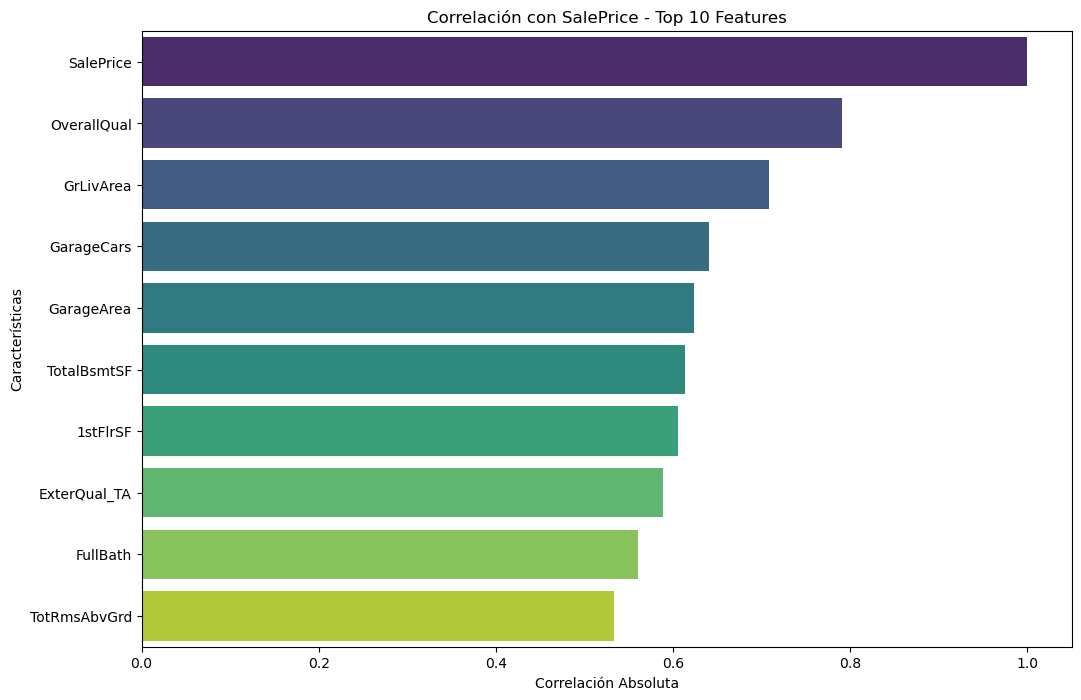

In [6]:
plt.figure(figsize=(12, 8))
sns.barplot(x=saleprice_correlation.head(10).values, y=saleprice_correlation.head(10).index, palette='viridis')
plt.title('Correlación con SalePrice - Top 10 Features')
plt.xlabel('Correlación Absoluta')
plt.ylabel('Características')
plt.show()

4. Cuándo se construyeron los diferentes casas? Dibuja un gráfico para visualizarlo

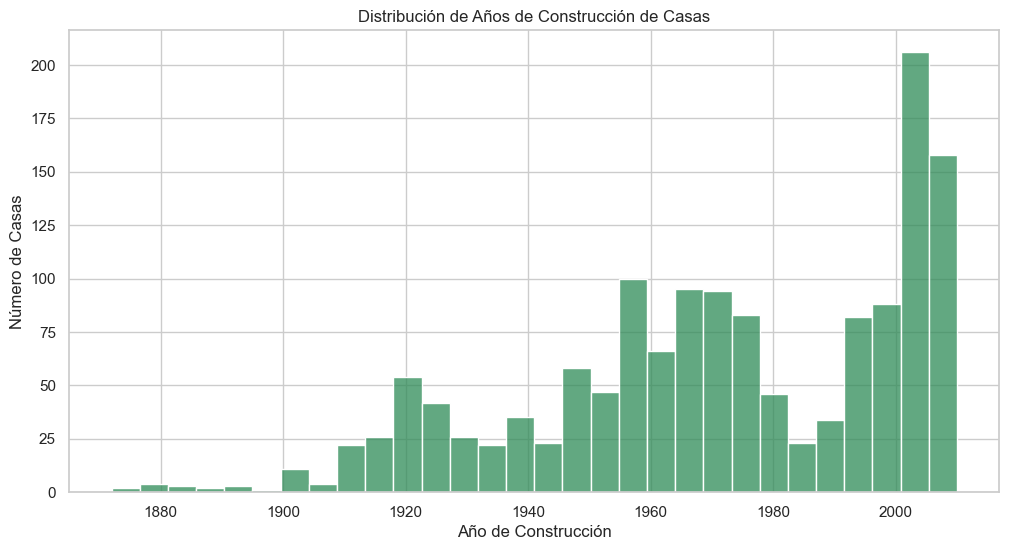

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.histplot(df['YearBuilt'], bins=30, kde=False, color='#2E8B57')

plt.title('Distribución de Años de Construcción de Casas')
plt.xlabel('Año de Construcción')
plt.ylabel('Número de Casas')
plt.show()


5. Cuánto tiempo tardaron las diferentes casas en venderse? Dibuja un gráfico para visualizarlo

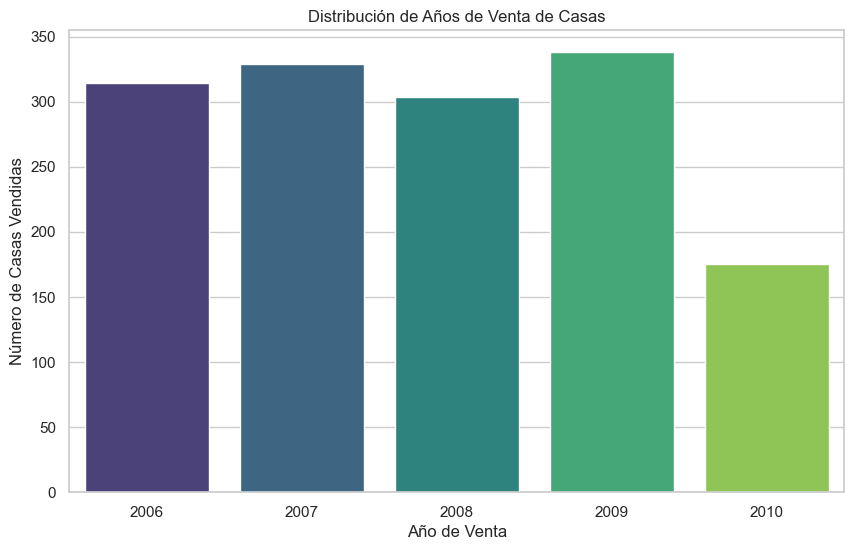

In [8]:
sns.set(style='whitegrid', palette='pastel')

plt.figure(figsize=(10, 6))
sns.countplot(x='YrSold', data=df, palette='viridis')
plt.title('Distribución de Años de Venta de Casas')
plt.xlabel('Año de Venta')
plt.ylabel('Número de Casas Vendidas')
plt.show()

In [9]:
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Ver el tipo de datos que tiene cada columna

In [10]:
df2.shape

(1460, 246)

In [11]:
best_features_df.iloc[1:10]['Correlation'].tolist()

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'ExterQual_TA',
 'FullBath',
 'TotRmsAbvGrd']

Las 10 columnas que mas correlacion tendria con SalePrice, en formato lista

In [12]:
df.SalePrice.min()

34900

### Limpiar los datos
Cuando creamos un modelo, no hay forma de "mágicamente" contar al modelo que es lo que queremos. Tenemos que usar unos datos que representan bien nuestro problema y crear un modelo que predice algo que alinea con la respuesta que buscamos.

Si los datos son "sucios" (malos, con problemas, reflejan algo que no representa bien a nuestro problema) - nuestro modelo va a predecir cosas que no acaban de tener mucho sentido, no son de fiar o directamente son equivocadas.

Cosas que queremos evitar

* Datos que no tienen que ver con nuestro problema
* Datos que tienen poca muestra
* Outliers
* Nulos

1. Identifique los principales problemas que tienen las variables que parecen (por ahora) más interesantes para el modelo

Pues datos nulls que afectan al modelo y datos de tipo Object que hay que borrarlos o convertirlos a formato numerico.

2. Arregla los problemas

In [13]:
# Obtén las columnas que tienen valores nulos y llenar con la media del resto de datos de cada columna
columnas_con_nulls = df2.columns[df2.isnull().any()].tolist()

for columna in columnas_con_nulls:
    media_columna = df2[columna].mean()
    df2[columna] = df2[columna].fillna(media_columna)


Los datos de tipo Object los converti a columnas dummy mas arriba

3. Borra todos los datos que no son relevantes para el problema - simplifica los datos

En mi caso para lo que quiero probar quiero dejar todos los datos ya que creo que todos pueden servir en menor o mayor medida

## Preparación de los datos para el modelo
Ahora que entendemos bien los datos, tomamos un paso más directo hacia la creación de nuestro modelo preparando los datos para el entrenamiento.

### Relevancia de variables
Por norma general, queremos incluir variables que son importantes en la predicción de nuestro target:

* Tener menos variables más relevantes suele ser mejor - porque simplifica el modelo
* Si no tenemos variables relevantes, los resultados del modelo van a ser malos

Para analizar la relevancia, normalmente miramos que haya "correlaciones" entre diferentes variables y el target. Hay muchas formas de analizar estas "correlaciones", como por ejemplo:

* Coeficiente de correlación (variables continuas)
* La media del target para cada valor del variable (variables NO continuas)

1. Qué variables son los más relevantes? Analiza la relevancia para comprobarlo

In [14]:
# Crear listas para almacenar los resultados
num_features_list = []
r2_list = []
mae_list = []
rmse_list = []

# Obtén la lista de características
all_features_list = best_features_df.iloc[1:, 0].tolist()

num_features_to_try = len(all_features_list)

for i in range(1, num_features_to_try + 1):
    # Selecciona las primeras i características
    selected_features = all_features_list[:i]
    
    # Divide los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(df2[selected_features], df2.SalePrice, test_size=0.2, random_state=8)

    # Crea y entrena el modelo de regresión lineal
    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    predictions = reg.predict(X_test)

    # Calcula el coeficiente de determinación (R^2)
    r2 = r2_score(y_test, predictions)
    
    # Calcula el MAE y el RMSE
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    
    # Almacena los resultados en las listas
    num_features_list.append(i)
    r2_list.append(r2)
    mae_list.append(mae)
    rmse_list.append(rmse)

# Crea el DataFrame a partir de las listas
results_df = pd.DataFrame({'Num_features': num_features_list, 'R2': r2_list, 'MAE': mae_list, 'RMSE': rmse_list})

# Muestra los resultados
results_df.sort_values(by=['R2', 'MAE', 'RMSE'], ascending=[False, True, True])

,Num_features,R2,MAE,RMSE
172,173,0.828808,17321.418914,30014.293332
173,174,0.828495,17378.620042,30041.684259
171,172,0.828197,17355.091618,30067.771718
170,171,0.828125,17400.417724,30074.046352
169,170,0.828030,17431.113864,30082.414271
174,175,0.827807,17435.749459,30101.923041
168,169,0.827606,17475.317452,30119.417917
176,177,0.827603,17439.740304,30119.729812
167,168,0.827541,17561.356296,30125.116752
175,176,0.827396,17487.048484,30137.762086


Aqui calculo con fuerza bruta con cuantas columnas consigo el mejor coeficiente de determinacion y a su vez un MAE Y RMSE bajos. En mi caso sale que el mejor resultado seria con 174 columnas, asi que en mi caso voy a crear 2 modelos.

###### 1- Muy complejo, pero si se tienen todos los datos entiendo que mas preciso 0.8288
###### 2- Simple y entiendo que lo mas facil pues solo necesita 5 columnas y daria un coeficiente de 0.7572

2. Podemos crear algunas variables para mejorar la relevancia?

En mi caso ya creo que tengo suficientes columnas como para crear mas

### Train y test
Dividir los datos en train y test (o train, test y validación) es un paso fundamental para la correcta evaluación de nuestro modelo. Buscamos replicar el efecto de "tener datos nuevos". 

Nota: En realidad, lo más correcto seria dividir en train / test ANTES de analizar relevancias - pero simplificamos un poco por ahora.

Nota 2: Si dividimos de forma *random* es importante fijar el seed (te vas a volver loco si no)

1. Qué variables quieres elegir para tu `X` final?

Todas menos SalePrice obviamente

2. Divide los datos en train / test

## Modelado
Ahora vamos a entrenar el modelo. Si has hecho lo anterior bien, este paso es muy sencillo. Normalmente incluimos aquí optimizaciones del modelo, pero para el primer ejercicio esto es de menor importancia.

### Entrenar el modelo
La parta más sexy, pero por ahora lo más sencillo. Tiramos de librerías de modelos ya hechos para simplificarnos la vida.  

1. Crea un modelo de regresión

Coeficiente de Determinación (R^2): 0.8288076349565676


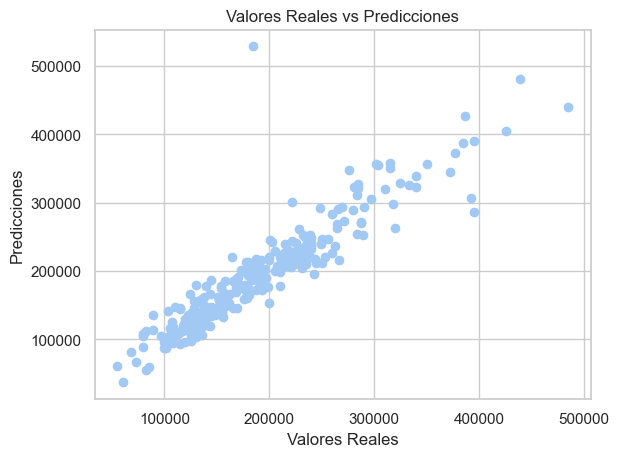

In [15]:
# df2.drop(523,inplace=True) # Esto mejoraria notablemente el modelo(0.90 de coeficiente) pero no quiero borrar una fila que a priori lo unico que tiene distinto es un LotArea superior al resto con sus caracteristicas.

X_train, X_test, y_train, y_test = train_test_split(df2[best_features_df.iloc[1:174]['Correlation'].tolist()], df2.SalePrice, test_size=0.2, random_state=8)

reg = linear_model.LinearRegression()

reg.fit(X_train,y_train)

predictions = reg.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f"Coeficiente de Determinación (R^2): {r2}")

plt.scatter(y_test, predictions)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones")
plt.show()

El modelo 1 bastante complejo y que si no se tienen todos los datos totalmente inutil creo

Coeficiente de Determinación (R^2): 0.7572609722098338


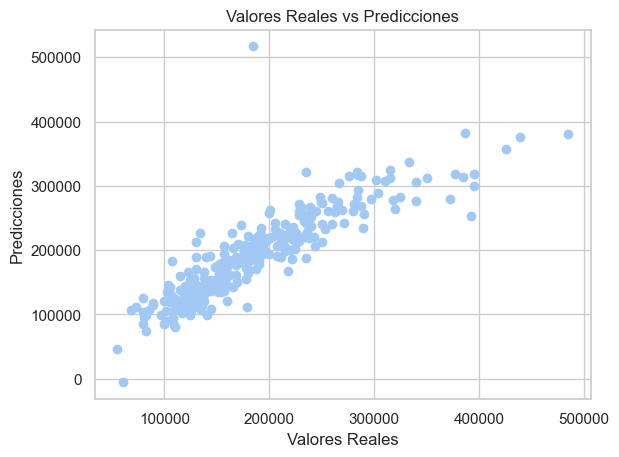

In [16]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2[best_features_df.iloc[1:6]['Correlation'].tolist()], df2.SalePrice, test_size=0.2, random_state=8)

reg2 = linear_model.LinearRegression()

reg2.fit(X_train2,y_train2)

predictions2 = reg2.predict(X_test2)

r2_2 = r2_score(y_test2, predictions2)
print(f"Coeficiente de Determinación (R^2): {r2_2}")

plt.scatter(y_test2, predictions2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones")
plt.show()

El modelo 2 simple con 5 columnas que a priori son las que mas correlacion tenian con SalePrice

2. Generar predicciones para tu conjunto de test

In [17]:
data = {
    'OverallQual': [8, 7, 6, 9, 8, 7, 6, 9, 8, 7],
    'GrLivArea': [2000, 1800, 1600, 2200, 2000, 1800, 1600, 2200, 2000, 1800],
    'GarageCars': [2, 2, 2, 3, 2, 2, 2, 3, 2, 2],
    'GarageArea': [500, 480, 460, 600, 500, 480, 460, 600, 500, 480],
    'TotalBsmtSF': [1000, 900, 800, 1100, 1000, 900, 800, 1100, 1000, 900]
}

reg2.predict(pd.DataFrame(data))

array([252443.98913696, 215830.6858017 , 179217.38246645, 306072.81268804,
       252443.98913696, 215830.6858017 , 179217.38246645, 306072.81268804,
       252443.98913696, 215830.6858017 ])

### Evaluar el modelo
No vamos a dedicar mucho esfuerzo en este paso por ahora, pero es fundamental evaluar las predicciones que hemos generado. El objetivo es entender lo bueno que es nuestro modelo, para entender si podemos fiar de los resultados y usarlo para responder a nuestro problema.

1. Elige las métricas para tu evaluación

2. Evalúa las predicciones generadas

In [18]:
mae = mean_absolute_error(y_test, predictions)
print(f"Error Absoluto Medio (MAE): {mae}")


Error Absoluto Medio (MAE): 17321.418913941176


In [19]:
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse}")


Raíz del Error Cuadrático Medio (RMSE): 30014.29333211952


3. El modelo funciona? Se podría utilizar para ayudarnos con el problema que tenemos?

Realmente yo creo que el modelo simple seria el mas util ya que el complejo es absurdamente complejo, aparte creo que cometo el error de sobreentrenarlo, y que tambien hay columnas que existen mas tipos de datos de un tipo que de otro...Tampoco acabo de entender como una sola fila la 523 puede influir tanto en el modelo.